In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.mixture import GaussianMixture
from scipy.stats import beta, gamma

In [11]:
folder_path = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 02 - Mean Field\Data\Auction_sample"
data = pd.read_csv(folder_path + r"\\auction_sample.csv" , index_col=0)
data = data[data['Sale/Purchase'] == "Sell"]
data

,Week,Week Day,Hour,Price,Volume,Sale/Purchase
Date,,,,,,
30/06/2020,27,2,1,-500.0,20078.9,Sell
30/06/2020,27,2,2,-500.0,21470.4,Sell
30/06/2020,27,2,3,-500.0,20720.2,Sell
30/06/2020,27,2,4,-500.0,20778.0,Sell
30/06/2020,27,2,5,-500.0,20717.7,Sell
...,...,...,...,...,...,...
30/06/2020,27,2,20,3000.0,33266.1,Sell
30/06/2020,27,2,21,3000.0,28528.4,Sell
30/06/2020,27,2,22,3000.0,27751.2,Sell


In [12]:
# Group by 'Price' and calculate the cumulative sum of 'Volume'
cumulative_volume = data.groupby('Price')['Volume'].cumsum()

# Create a new DataFrame with 'Price' and 'Cumulative_Volume' columns
cumulative_data = pd.DataFrame({'Price': data['Price'], 'Cumulative_Volume': cumulative_volume})

# Drop duplicate rows to keep only unique 'Price' values
cumulative_data = cumulative_data.drop_duplicates(subset='Price', keep='last')

# Reset the index for the new DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Sort the DataFrame by ascending 'Price'
cumulative_data = cumulative_data.sort_values(by='Price')

# Calculate the cumulative sum of 'Cumulative_Volume' and add it as a new column
cumulative_data['Cumulative_Sum'] = cumulative_data['Cumulative_Volume'].cumsum()

# Reset the index for the updated DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cumulative_data)

       Price  Cumulative_Volume  Cumulative_Sum
0     -500.0           576840.5        576840.5
1     -499.1           394712.4        971552.9
2     -499.0           576914.8       1548467.7
3     -498.9           585074.8       2133542.5
4     -498.1           585075.6       2718618.1
...      ...                ...             ...
1420  2990.0           813898.9     474639072.3
1421  2999.0           813925.6     475452997.9
1422  2999.8           302422.5     475755420.4
1423  2999.9           271261.4     476026681.8
1424  3000.0           813928.3     476840610.1

[1425 rows x 3 columns]


      Price  Cumulative_Volume  Cumulative_Sum
0    -500.0            20078.9         20078.9
1    -499.1            20078.9         40157.8
2    -499.0            20082.9         60240.7
3    -498.9            20422.9         80663.6
4    -498.1            20422.9        101086.5
..      ...                ...             ...
651  2990.0            30604.0      16576281.3
652  2999.0            30606.3      16606887.6
653  2999.8            30606.5      16637494.1
654  2999.9            30606.6      16668100.7
655  3000.0            30606.7      16698707.4

[656 rows x 3 columns]


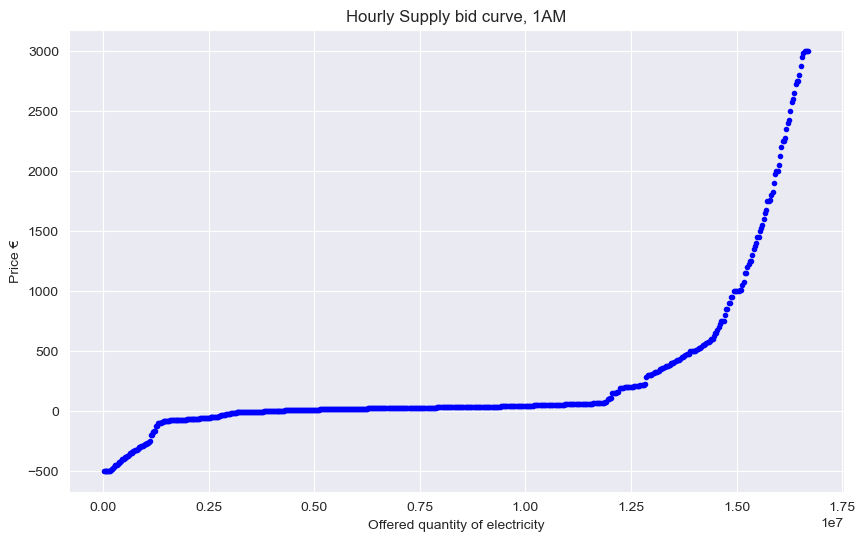

In [14]:
# Filter the initial DataFrame to keep rows where 'Hour' is 1
filtered_data1 = data[data['Hour'] == 1]

# Group by 'Price' and calculate the cumulative sum of 'Volume'
cumulative_volume = filtered_data1.groupby('Price')['Volume'].cumsum()

# Create a new DataFrame with 'Price' and 'Cumulative_Volume' columns
cumulative_data = pd.DataFrame({'Price': filtered_data1['Price'], 'Cumulative_Volume': cumulative_volume})

# Drop duplicate rows to keep only unique 'Price' values
cumulative_data = cumulative_data.drop_duplicates(subset='Price', keep='last')

# Reset the index for the new DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Sort the DataFrame by ascending 'Price'
cumulative_data = cumulative_data.sort_values(by='Price')

# Calculate the cumulative sum of 'Cumulative_Volume' and add it as a new column
cumulative_data['Cumulative_Sum'] = cumulative_data['Cumulative_Volume'].cumsum()

# Reset the index for the updated DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cumulative_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cumulative_data['Cumulative_Sum'], cumulative_data['Price'], marker='.', color='blue')
plt.title('Hourly Supply bid curve, 1AM')
plt.xlabel('Offered quantity of electricity')
plt.ylabel('Price €')
plt.grid(True)

# Show the plot
plt.show()

      Price  Cumulative_Volume  Cumulative_Sum
0    -500.0            29196.6         29196.6
1    -499.1            29196.6         58393.2
2    -499.0            29198.6         87591.8
3    -498.9            29538.6        117130.4
4    -498.1            29538.6        146669.0
..      ...                ...             ...
799  2875.0            40010.8      27845945.4
800  2950.0            40013.0      27885958.4
801  2990.0            40014.1      27925972.5
802  2999.0            40014.4      27965986.9
803  3000.0            40014.4      28006001.3

[804 rows x 3 columns]


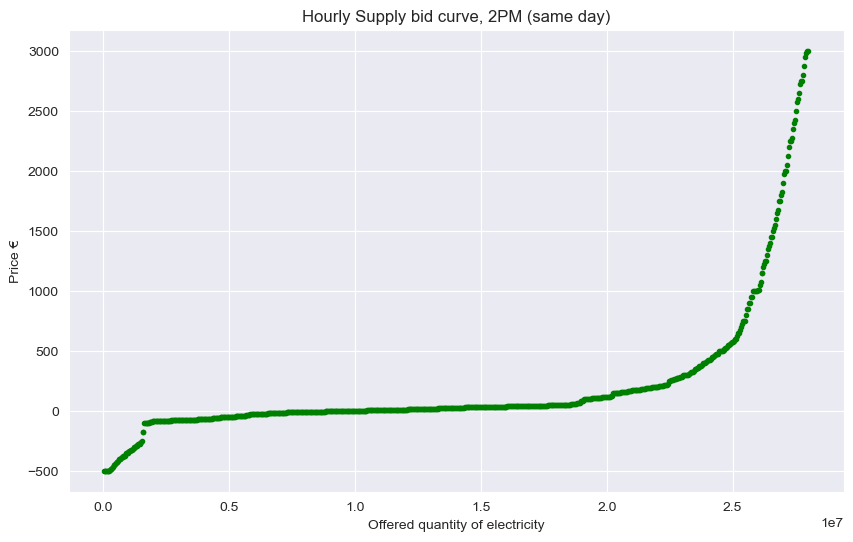

In [15]:
# Filter the initial DataFrame to keep rows where 'Hour' is 1
filtered_data14 = data[data['Hour'] == 14]

# Group by 'Price' and calculate the cumulative sum of 'Volume'
cumulative_volume = filtered_data14.groupby('Price')['Volume'].cumsum()

# Create a new DataFrame with 'Price' and 'Cumulative_Volume' columns
cumulative_data = pd.DataFrame({'Price': filtered_data14['Price'], 'Cumulative_Volume': cumulative_volume})

# Drop duplicate rows to keep only unique 'Price' values
cumulative_data = cumulative_data.drop_duplicates(subset='Price', keep='last')

# Reset the index for the new DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Sort the DataFrame by ascending 'Price'
cumulative_data = cumulative_data.sort_values(by='Price')

# Calculate the cumulative sum of 'Cumulative_Volume' and add it as a new column
cumulative_data['Cumulative_Sum'] = cumulative_data['Cumulative_Volume'].cumsum()

# Reset the index for the updated DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cumulative_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cumulative_data['Cumulative_Sum'], cumulative_data['Price'], marker='.', color='green')
plt.title('Hourly Supply bid curve, 2PM (same day)')
plt.xlabel('Offered quantity of electricity')
plt.ylabel('Price €')
plt.grid(True)

# Show the plot
plt.show()